In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df=pd.read_csv(r"C:\Users\Sanjay\Desktop\major project\new dataset\statewisedataset.csv")


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   S. No.    39 non-null     object
 1   Category  39 non-null     object
 2   State/UT  39 non-null     object
 3   2014      39 non-null     int64 
 4   2015      39 non-null     int64 
 5   2016      39 non-null     int64 
 6   2017      39 non-null     int64 
 7   2018      39 non-null     int64 
 8   2019      39 non-null     int64 
 9   2020      39 non-null     int64 
 10  2021      39 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 3.5+ KB


In [20]:
df.shape

(39, 11)

In [24]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,37.384615,28.076923,29.384615,37.846154,39.769231,31.461538,14.692308,11.538462
std,96.199523,72.479538,75.023721,97.026187,102.150936,80.646351,37.761826,30.480232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,1.000000
75%,11.000000,14.000000,13.500000,20.000000,15.500000,17.500000,6.000000,9.000000
max,486.000000,365.000000,382.000000,492.000000,517.000000,409.000000,191.000000,150.000000


In [27]:
print(df.isna().sum())

S. No.      0
Category    0
State/UT    0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
dtype: int64


In [28]:
df.isnull().sum()

S. No.      0
Category    0
State/UT    0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
dtype: int64

In [31]:
df.columns

Index(['S. No.', 'Category', 'State/UT', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [33]:
# Drop serial number if not needed
df = df.drop(columns=['S. No.'])


In [34]:
# Melt year columns into rows
df_melted = df.melt(id_vars=['Category', 'State/UT'], 
                    var_name='Year', 
                    value_name='Cases')

# Convert Year to int and Cases to numeric
df_melted['Year'] = df_melted['Year'].astype(int)
df_melted['Cases'] = pd.to_numeric(df_melted['Cases'], errors='coerce')


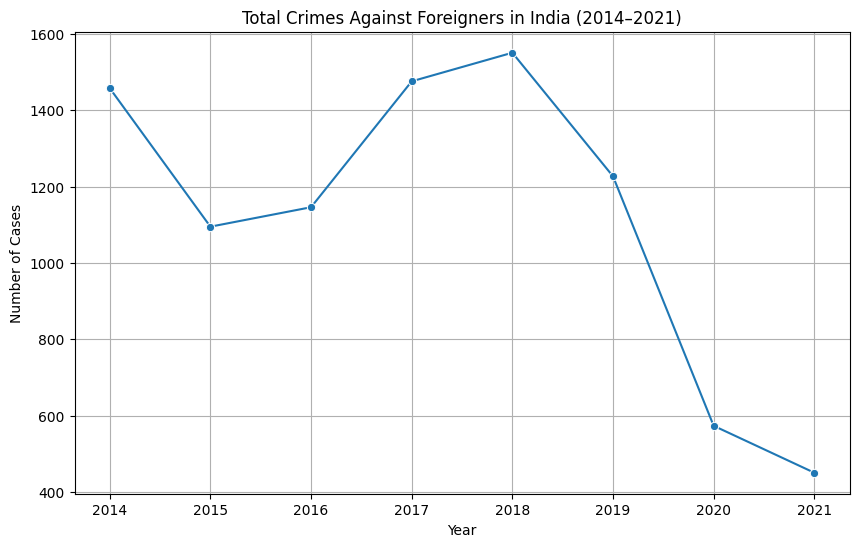

In [35]:
yearly_total = df_melted.groupby('Year')['Cases'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_total.index, y=yearly_total.values, marker='o')
plt.title("Total Crimes Against Foreigners in India (2014–2021)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()


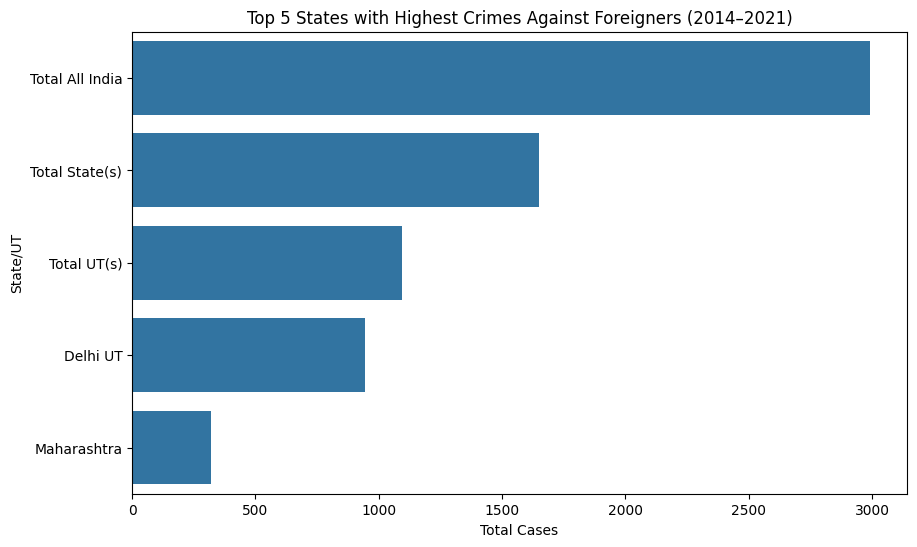

In [36]:
top_states = df_melted.groupby('State/UT')['Cases'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 5 States with Highest Crimes Against Foreigners (2014–2021)")
plt.xlabel("Total Cases")
plt.ylabel("State/UT")
plt.show()


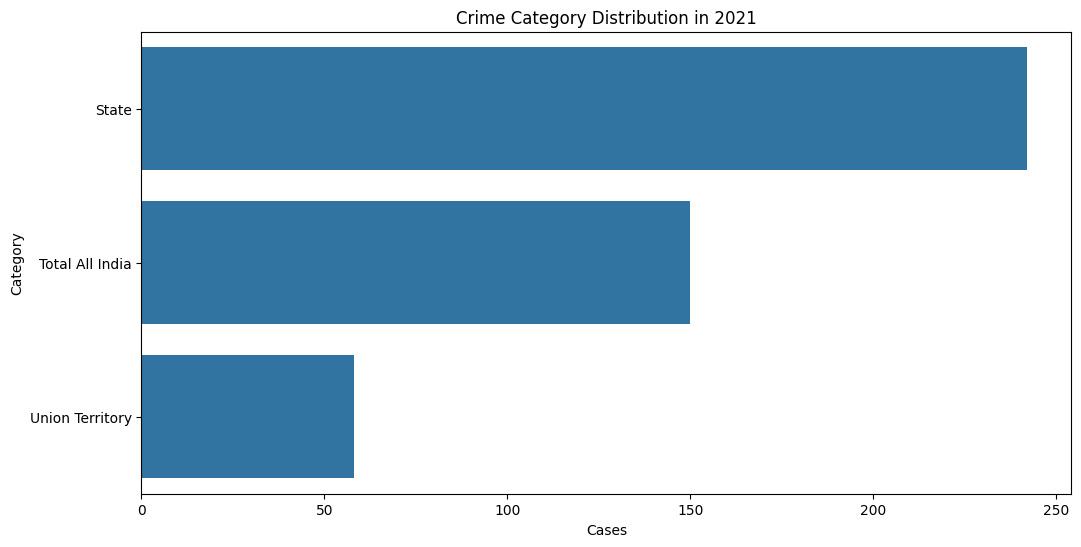

In [37]:
cat_2021 = df_melted[df_melted['Year'] == 2021].groupby('Category')['Cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=cat_2021.values, y=cat_2021.index)
plt.title("Crime Category Distribution in 2021")
plt.xlabel("Cases")
plt.ylabel("Category")
plt.show()


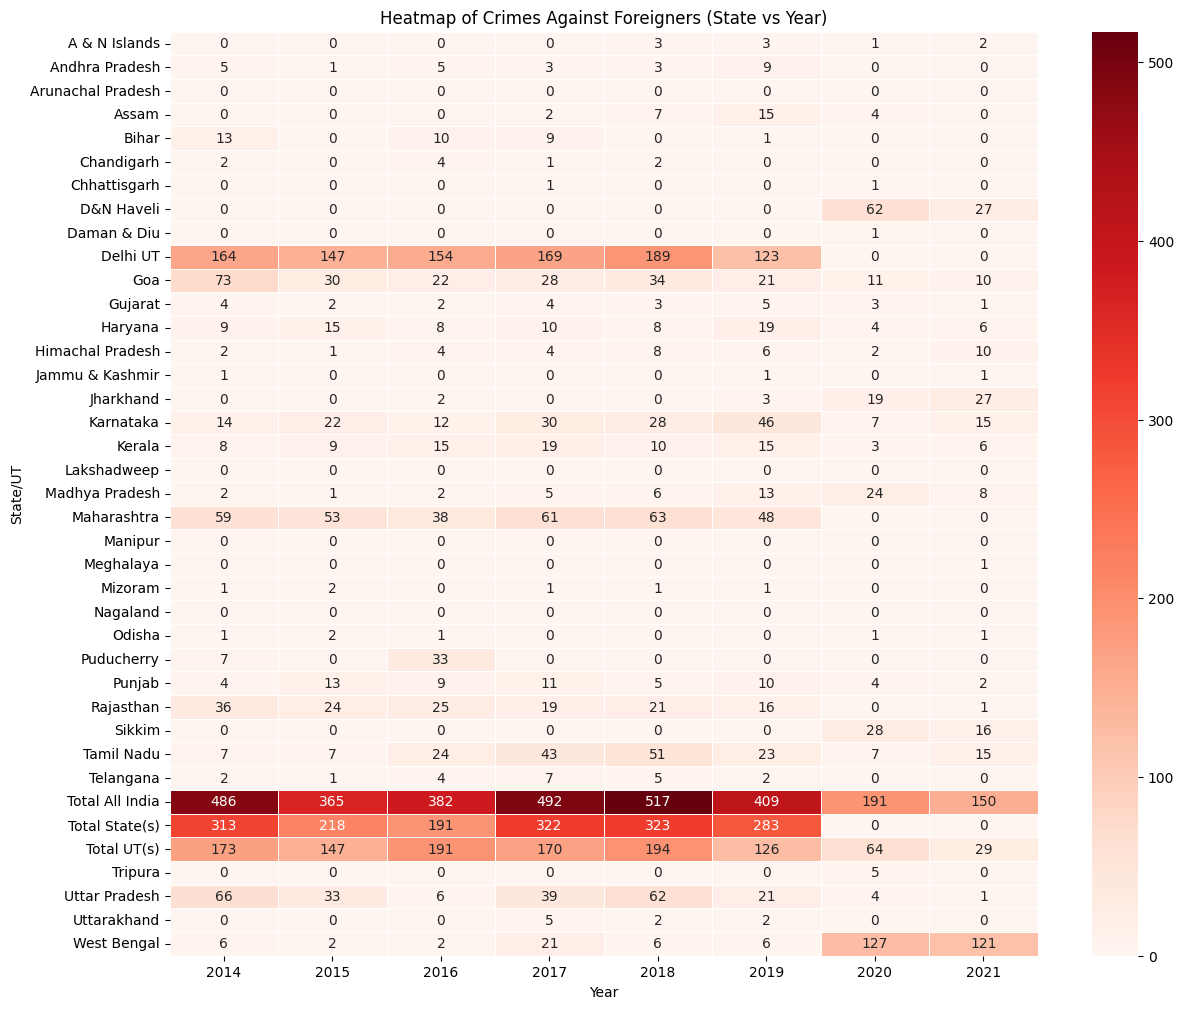

In [38]:
heatmap_data = df_melted.pivot_table(index='State/UT', columns='Year', values='Cases', aggfunc='sum')

plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, cmap='Reds', linewidths=0.5, annot=True, fmt='.0f')
plt.title("Heatmap of Crimes Against Foreigners (State vs Year)")
plt.xlabel("Year")
plt.ylabel("State/UT")
plt.show()


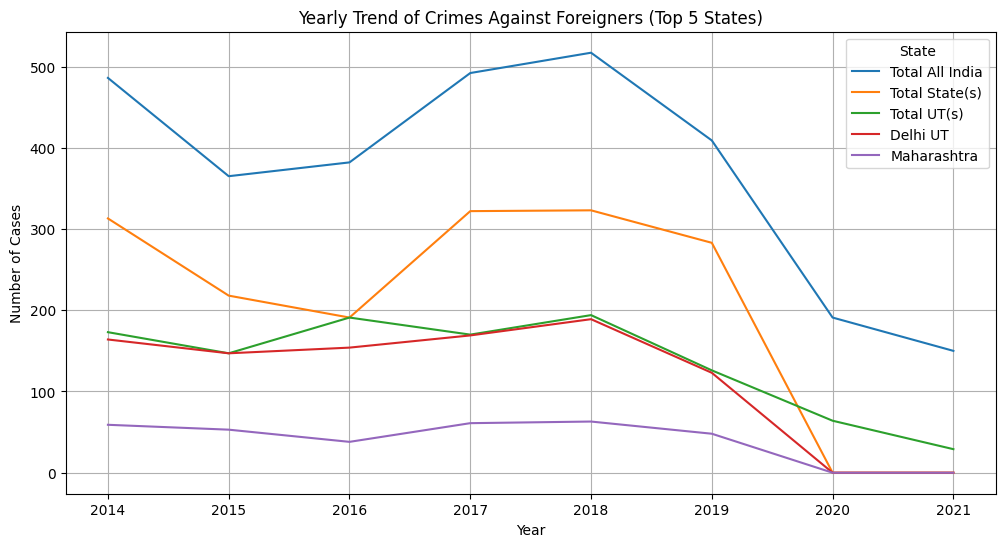

In [39]:
# Get top 5 states with highest total cases
top_states = df_melted.groupby('State/UT')['Cases'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 6))
for state in top_states:
    subset = df_melted[df_melted['State/UT'] == state]
    sns.lineplot(data=subset, x='Year', y='Cases', label=state)

plt.title("Yearly Trend of Crimes Against Foreigners (Top 5 States)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend(title="State")
plt.grid(True)
plt.show()


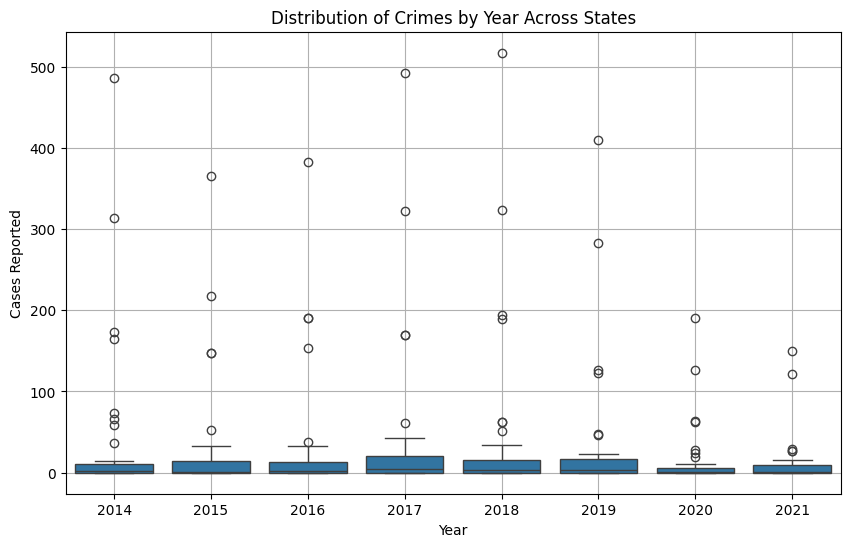

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Year', y='Cases')
plt.title("Distribution of Crimes by Year Across States")
plt.xlabel("Year")
plt.ylabel("Cases Reported")
plt.grid(True)
plt.show()


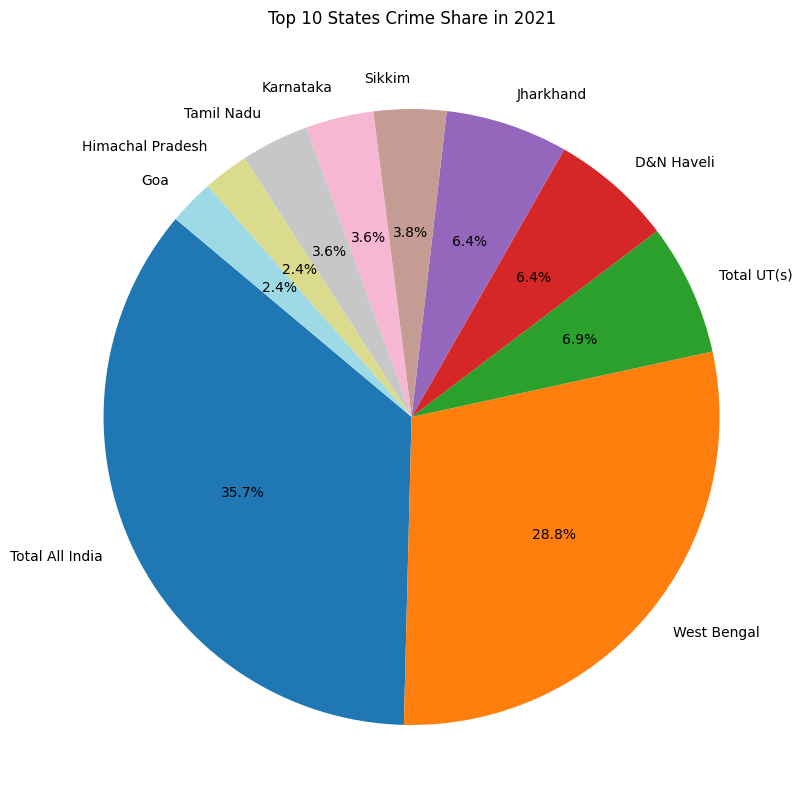

In [41]:
year_2021 = df_melted[df_melted['Year'] == 2021]
state_totals = year_2021.groupby('State/UT')['Cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
state_totals[:10].plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title("Top 10 States Crime Share in 2021")
plt.ylabel("")  # Hide y-label
plt.show()


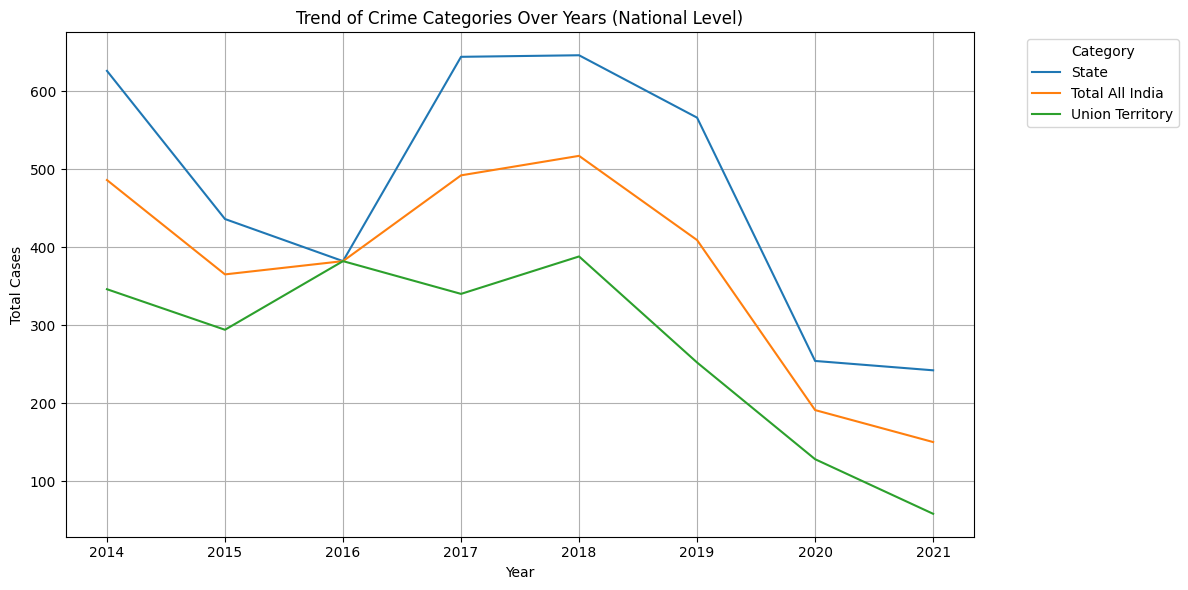

In [42]:
category_trend = df_melted.groupby(['Year', 'Category'])['Cases'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=category_trend, x='Year', y='Cases', hue='Category')
plt.title("Trend of Crime Categories Over Years (National Level)")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


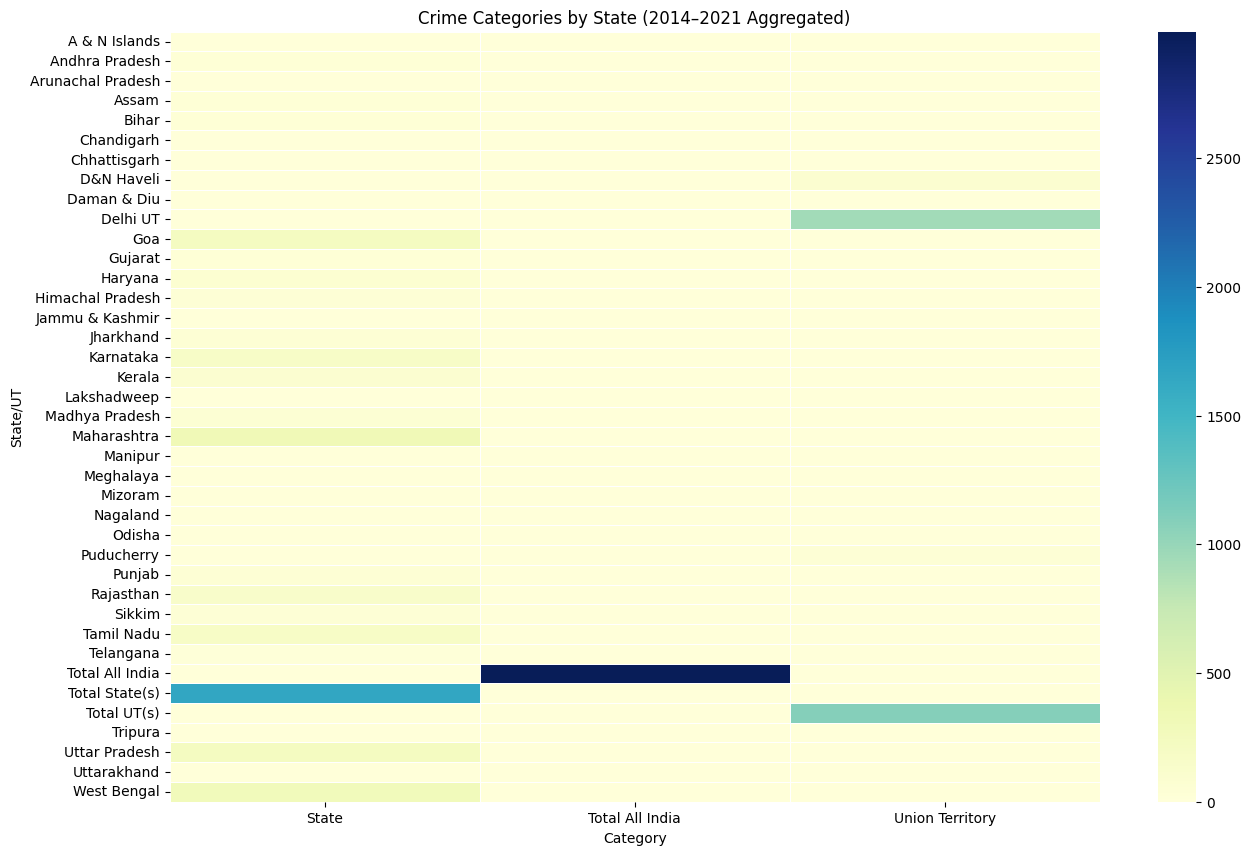

In [43]:
pivot = df_melted.groupby(['State/UT', 'Category'])['Cases'].sum().reset_index()
heatmap_data = pivot.pivot(index='State/UT', columns='Category', values='Cases').fillna(0)

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Crime Categories by State (2014–2021 Aggregated)")
plt.xlabel("Category")
plt.ylabel("State/UT")
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical columns
df_melted['State_Code'] = df_melted['State/UT'].astype('category').cat.codes
df_melted['Category_Code'] = df_melted['Category'].astype('category').cat.codes

# Features and target
X = df_melted[['Year', 'State_Code', 'Category_Code']]
y = df_melted['Cases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Use Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)


Root Mean Squared Error (RMSE): 29.987935298917524
R-squared (R2 Score): 0.880946540104683


In [48]:
# Example: Predict 2022 for Delhi, 'Rape' category (get actual values from df)
state_name = 'Delhi'
category_name = 'Rape'

state_code = df_melted[df_melted['State/UT'] == state_name]['State_Code'].values[0]
cat_code = df_melted[df_melted['Category'] == category_name]['Category_Code'].values[0]

# Predict for 2022
future_data = pd.DataFrame([[2022, state_code, cat_code]], columns=['Year', 'State_Code', 'Category_Code'])
prediction = model.predict(future_data)

print(f"Predicted Cases in {state_name} for category '{category_name}' in 2022:", int(prediction[0]))


IndexError: index 0 is out of bounds for axis 0 with size 0

In [49]:
category_name = 'Rape'
cat_code = df_melted[df_melted['Category'] == category_name]['Category_Code'].values[0]

future_preds = []
for state_name in df_melted['State/UT'].unique():
    state_code = df_melted[df_melted['State/UT'] == state_name]['State_Code'].values[0]
    input_row = pd.DataFrame([[2023, state_code, cat_code]], columns=['Year', 'State_Code', 'Category_Code'])
    pred = model.predict(input_row)[0]
    future_preds.append((state_name, int(pred)))

# Display predictions
for state, pred in sorted(future_preds, key=lambda x: x[1], reverse=True):
    print(f"{state}: {pred} cases predicted in 2023 ({category_name})")


IndexError: index 0 is out of bounds for axis 0 with size 0